In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [2]:
# Getting the stock price data from Yahoo Finance
Start = "2015-01-01"
Today = date.today().strftime("%Y-%m-%d")
ticker = 'AMZN'
data = yf.download(ticker, Start, Today)
df = data
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2023-04-24,107.660004,109.230003,105.070000,106.209999,106.209999,69575600
2023-04-25,104.910004,105.449997,102.449997,102.570000,102.570000,65026800
2023-04-26,105.040001,106.620003,104.099998,104.980003,104.980003,73803800


In [3]:
df = df.reset_index()
df.head()

# Moving average 100 calculation
ma100 = df.Close.rolling(100).mean()

# Moving average 200 calculation
ma200 = df.Close.rolling(200).mean()

(2095, 7)

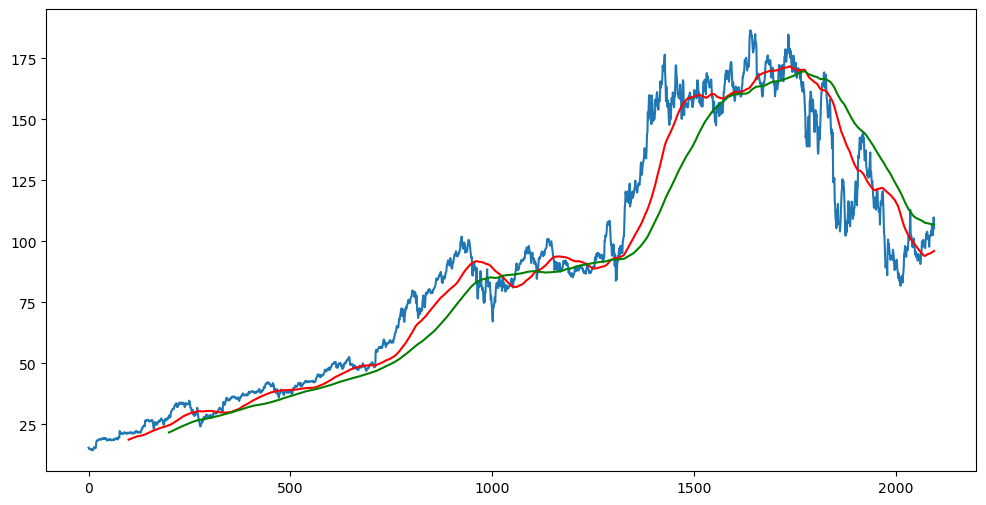

In [4]:
# Chart for ma100 and ma200
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
df.shape

In [5]:
# Preprocessing the data
# Resample to daily frequency, forward fill missing values, and drop any remaining NaNs
data = data['Close'].resample('D').ffill().dropna()
# Scaling the data
scaler = MinMaxScaler()
data = scaler.fit_transform(np.array(data).reshape(-1, 1))

# Creating the features and target variables
lookback = 60 # Number of days to look back
X = []
y = []
for i in range(lookback, len(data)):
    X.append(data[i-lookback:i, 0])
    y.append(data[i, 0])
X, y = np.array(X), np.array(y)

# Splitting the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [6]:
# Creating the multilayer SVM model with RBF kernel
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Fitting the model to the data
model.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [7]:
# Predicting the stock prices for the test set
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Evaluating the model using mean squared error
mse = mean_squared_error(y_test, predicted_stock_prices)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 138.24311407726606


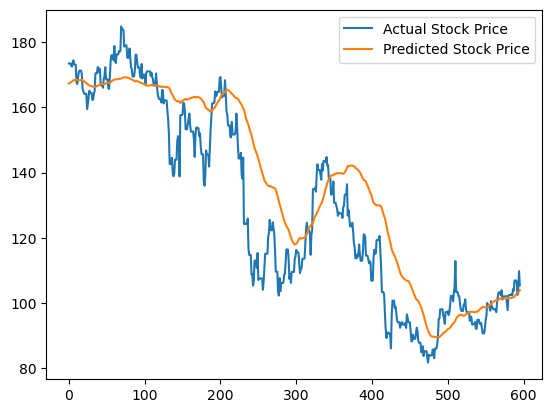

In [8]:
# Visualizing the results
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Stock Price')
plt.plot(predicted_stock_prices, label='Predicted Stock Price')
plt.legend()
plt.show()